In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math
from matplotlib.ticker import ScalarFormatter

In [116]:
mcmuons=uproot.open("jstracking_print_FASERnu1_10_muminus.root")
pilotmuons=uproot.open("jstracking_print_pilotdata.root")

In [133]:
mcmuons.keys()

['tracks;1']

In [134]:
pilotmuons.keys()

['tracks;2', 'tracks;1']

In [95]:
muons["tracks"].members

{'fEntries': 12,
 'fTotBytes': 89156,
 'fZipBytes': 23980,
 'fSavedBytes': 0,
 'fFlushedBytes': 0,
 'fWeight': 1.0,
 'fTimerInterval': 0,
 'fScanField': 25,
 'fUpdate': 0,
 'fDefaultEntryOffsetLen': 1000,
 'fNClusterRange': 0,
 'fMaxEntries': 1000000000000,
 'fMaxEntryLoop': 1000000000000,
 'fMaxVirtualSize': 0,
 'fAutoSave': -300000000,
 'fAutoFlush': -30000000,
 'fEstimate': 1000000,
 'fClusterRangeEnd': array([], dtype=int64),
 'fClusterSize': array([], dtype=int64),
 'fBranches': <TObjArray of 10 items at 0x0216b1773ac8>,
 'fLeaves': <TObjArray of 100 items at 0x0216b18e9f48>,
 'fAliases': None}

In [138]:
mcmuons["tracks;1"].typenames

<bound method HasBranches.typenames of <TTree 'tracks' (10 branches) at 0x0216b45b8288>>

In [139]:
pilotmuons["tracks;1"].typenames

<bound method HasBranches.typenames of <TTree 'tracks' (10 branches) at 0x0216ae4a9888>>

In [65]:
muons["tracks;1"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
trid                 | int32_t                  | AsDtype('>i4')
nseg                 | int32_t                  | AsDtype('>i4')
npl                  | int32_t                  | AsDtype('>i4')
n0                   | int32_t                  | AsDtype('>i4')
xv                   | float                    | AsDtype('>f4')
yv                   | float                    | AsDtype('>f4')
w                    | float                    | AsDtype('>f4')
t.                   | EdbSegP                  | AsGroup(<TBranchElement 't....
t./t.TObject         | (group of t.TObject.f... | AsGroup(<TBranchElement 't....
t./t.TObject/t.TO... | uint32_t                 | AsDtype('>u4')
t./t.TObject/t.TO... | uint32_t                 | AsDtype('>u4')
t./t.ePID            | int32_t                  | AsDtype('>i4')
t./t.eID             | int

In [175]:
muons["tracks;1"]["t."].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
t.                   | EdbSegP                  | AsGroup(<TBranchElement 't.' (
t.TObject            | (group of t.TObject.f... | AsGroup(<TBranchElement 't....
t.TObject/t.TObje... | uint32_t                 | AsDtype('>u4')
t.TObject/t.TObje... | uint32_t                 | AsDtype('>u4')
t.ePID               | int32_t                  | AsDtype('>i4')
t.eID                | int32_t                  | AsDtype('>i4')
t.eVid[2]            | int32_t[2]               | AsDtype("('>i4', (2,))")
t.eAid[2]            | int32_t[2]               | AsDtype("('>i4', (2,))")
t.eFlag              | int32_t                  | AsDtype('>i4')
t.eTrack             | int32_t                  | AsDtype('>i4')
t.eX                 | float                    | AsDtype('>f4')
t.eY                 | float                    | AsDtype('>f4')
t.eZ  

In [181]:
print(mcmuons["tracks;1"]["t.eX"].array())

[-1.2e+03, -2.14e+03, -562, -1.07e+03, 541, ... -384, -2.17e+03, -690, -746, -626]


In [188]:
mcmuons["tracks;1"]["s.eScanID.ePlate"].array()

<Array [[90, 91, 92, 93, ... 107, 108, 109]] type='12 * var * int32'>

In [69]:
len(muons["tracks;1"]["s.eScanID.ePlate"].array())

100982

In [97]:
x=muons["tracks"]["s.eX"].array()

In [98]:
len(x)

12

In [124]:
pilotxarr=pilotmuons["tracks;1"]["s.eX"].array()
pilotyarr=pilotmuons["tracks;1"]["s.eY"].array()
pilotzarr=pilotmuons["tracks;1"]["s.eZ"].array()
pilottrkid=pilotmuons["tracks;1"]["trid"].array()

In [140]:
len(pilottrkid)

100982

In [146]:
mcmuons["tracks;1"]["npl"].array()

<Array [29, 29, 29, 29, 29, ... 29, 29, 2, 4] type='12 * int32'>

In [147]:
mcmuons["tracks;1"]["nseg"].array()

<Array [29, 29, 29, 29, 29, ... 29, 29, 2, 4] type='12 * int32'>

In [169]:
pilotmuons["tracks;1"]["w"].array()

<Array [0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0] type='100982 * float32'>

In [135]:
mcxarr=mcmuons["tracks;1"]["s.eX"].array()
mcyarr=mcmuons["tracks;1"]["s.eY"].array()
mczarr=mcmuons["tracks;1"]["s.eZ"].array()
mctrkid=mcmuons["tracks;1"]["trid"].array()

In [200]:
print("eID =",mcmuons["tracks;1"]["s.eID"].array())

eID= [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 12, 12, 12], [8, 8], [8, 8, 8, 8]]


In [196]:
mcmuons["tracks;1"]["s.ePID"].array()

<Array [[0, 0, 0, 0, 0, 0, ... [0, 0, 0, 0]] type='12 * var * int32'>

In [142]:
len(mctrkid)

12

In [165]:
mcplates=mcmuons["tracks;1"]["npl"].array()
print(mcplates)

[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2, 4]


In [167]:
pilotn0=pilotmuons["tracks;1"]["n0"].array()
print(pilotn0)

[2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0, ... 1, 1, 1, 3, 0, 0, 8, 3, 0, 2, 2, 0, 1]


In [136]:
mcx=np.array([]) 
mcy=np.array([]) 
mcz=np.array([]) 
for i in range(0,len(mctrkid)):
    mcx=np.concatenate((mcx, mcxarr[i]), axis=None) 
    mcy=np.concatenate((mcy, mcyarr[i]), axis=None)
    mcz=np.concatenate((mcz, mczarr[i]), axis=None)

In [131]:
pilotx=np.array([]) 
piloty=np.array([]) 
pilotz=np.array([]) 
for i in range(0,len(pilottrkid)):
    pilotx=np.concatenate((pilotx, pilotxarr[i]), axis=None) 
    piloty=np.concatenate((piloty, pilotyarr[i]), axis=None)
    pilotz=np.concatenate((pilotz, pilotzarr[i]), axis=None)

In [152]:
mczarr[10]

<Array [-9.15e+03, -7.85e+03] type='2 * float32'>

No handles with labels found to put in legend.


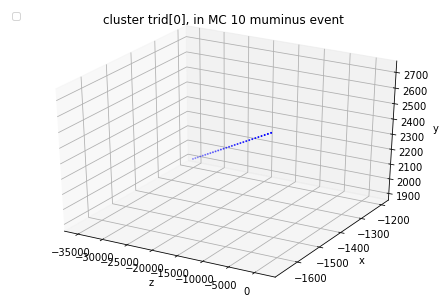

In [203]:
i=0
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(mczarr[i],mcxarr[i],mcyarr[i],s=1,color='blue')
ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')
plt.legend(loc='upper left')
plt.title('cluster trid[0], in MC 10 muminus event')
plt.show()

No handles with labels found to put in legend.


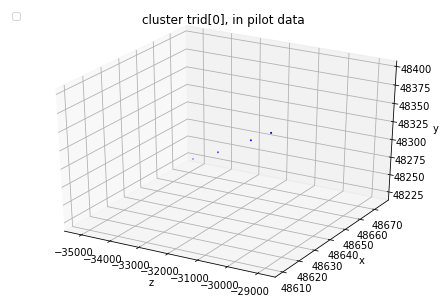

In [204]:
i=0
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pilotzarr[i],pilotxarr[i],pilotyarr[i],s=1,color='blue')
ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')
plt.legend(loc='upper left')
plt.title('cluster trid[0], in pilot data')
plt.show()

No handles with labels found to put in legend.


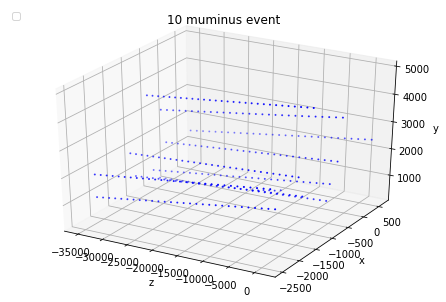

In [137]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(mcz,mcx,mcy,s=1,color='blue')
ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')
plt.legend(loc='upper left')
plt.title('10 muminus event')
plt.show()

No handles with labels found to put in legend.


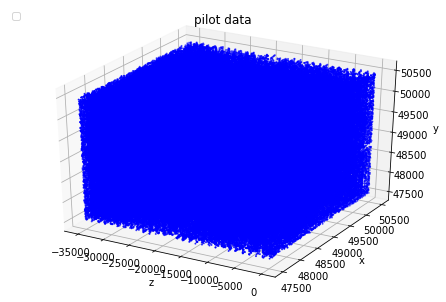

In [132]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pilotz,pilotx,piloty,s=1,color='blue')
ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')
plt.legend(loc='upper left')
plt.title('pilot data')
plt.show()